In [ ]:
                                                                                        """ K-Neirest neighbourts """

In [ ]:
import pandas as pd

In [ ]:
data = {
    "tinggi" : [145,156,167,145,133,143,167,124,155,154,145,167,132,122,128,192,200,172,174,161,152],
    "berat"  : [55,51,50,67,77,64,48,72,78,58,88,56,78,56,65,47,55,53,58,59,60],
    "ukuran" : ["kecil","kecil","kecil","kecil","besar","besar","kecil","besar","kecil","besar","kecil","besar","besar","kecil","kecil","kecil","besar","besar","besar","besar","kecil"]
}

In [ ]:
###pd_data = pd.DataFrame.from_dict(dict(data),orient="index",)
##pd_data.head(5)

In [ ]:
#atau
pd_data = pd.DataFrame(data)

pd_data.head(5)

,tinggi,berat,ukuran
0,145,55,kecil
1,156,51,kecil
2,167,50,kecil
3,145,67,kecil
4,133,77,besar


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#classifikasi numpy

In [ ]:
import numpy as np

In [ ]:
feature_valid = np.array(pd_data[['berat','tinggi']])
feature = np.array([[pd_data['berat']], [pd_data['tinggi']]]).reshape(-2,2)


In [ ]:
pd_data['ukuran'].replace({'besar':1,'kecil':0}, inplace=True)
target = np.array(pd_data['ukuran'])


In [ ]:
target

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(feature_valid, target, test_size=0.1)
x_test

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train,x_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#coba prediksi
new_data =np.array([54,145]).reshape(1,-1)
new_data

array([[ 54, 145]])

In [ ]:
model.predict(new_data)

array([0])

In [ ]:
model.score(x_train, x_test)

0.8888888888888888

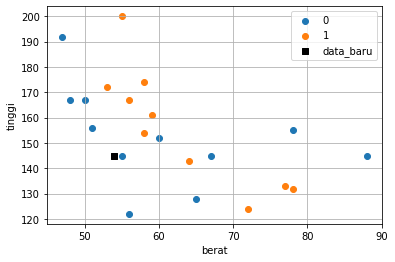

In [ ]:
for uk,x in pd_data.groupby('ukuran'):
  plt.scatter(x['berat'],x['tinggi'], label=uk)

plt.scatter(54,145, marker='s', color='black', label='data_baru')

plt.legend(loc="upper right")
plt.xlabel("berat")
plt.ylabel("tinggi")
plt.grid(True)
plt.show()

In [ ]:
## kalkukasi euclidean distance pada k-nearest neighbors

In [ ]:
new_data =np.array([54,145])


In [ ]:
from scipy.spatial.distance import euclidean

data_jarak = []
for x in feature_valid:
  data_jarak.append(euclidean(new_data, x))  

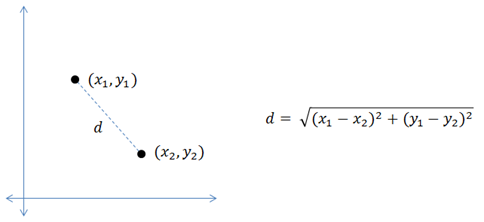

In [ ]:
pd_data['jarak_euclidean'] = data_jarak
pd_data.sort_values(['jarak_euclidean']).head(5)

,tinggi,berat,ukuran,jarak_euclidean
0,145,55,0,1.000000
20,152,60,0,9.219544
9,154,58,1,9.848858
5,143,64,1,10.198039
1,156,51,0,11.401754


In [ ]:
############################################ EVALUASI #####################################

# 1. Accuracy
# 2. precission
# 3. recall
# 4. F-1

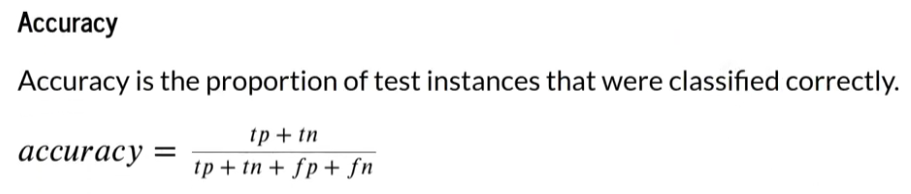

In [ ]:
x_test_evaluate = np.array([[52,167],[53,200],[70,172],[55,161]])
y_test_evaluate = np.array([0,1,1,0])

prediksi_evaluasi = model.predict(x_test_evaluate)
prediksi_evaluasi

array([0, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test_evaluate, prediksi_evaluasi)
acc

0.75

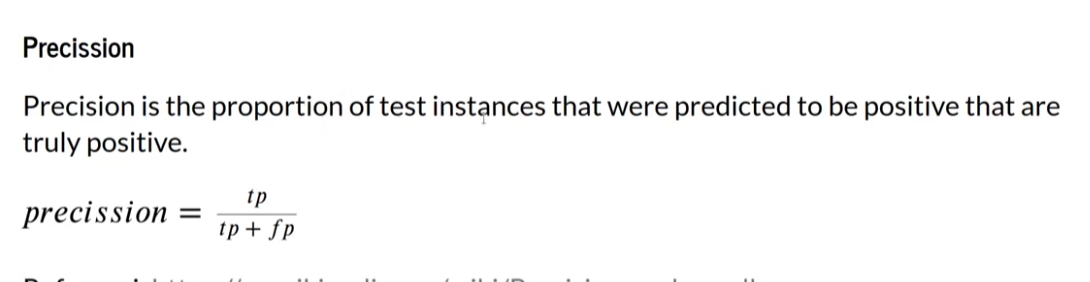

In [ ]:
from sklearn.metrics import precision_score
acc_pre = precision_score(y_test_evaluate, prediksi_evaluasi)
acc_pre

0.6666666666666666

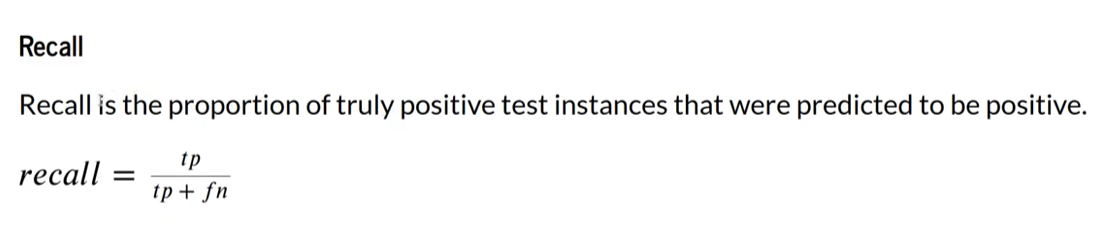

In [ ]:
from sklearn.metrics import recall_score
acc_rec = recall_score(y_test_evaluate, prediksi_evaluasi)
acc_rec

1.0

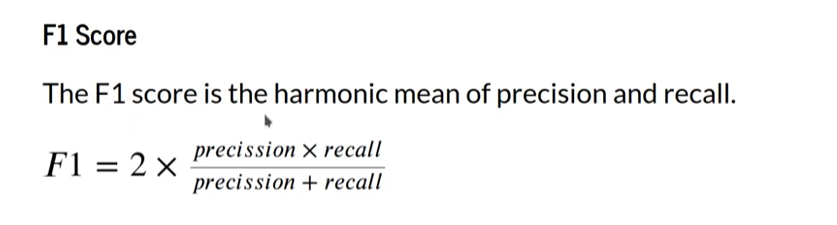

In [ ]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test_evaluate, prediksi_evaluasi)
f1_score

0.8

In [ ]:
from sklearn.metrics import classification_report
report_clasify = classification_report(y_test_evaluate, prediksi_evaluasi)
print(f'{report_clasify}')

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

